In [1]:
"""Group 13 Dorian Chavez, Aqsa Latif, Awa Lowe, Tenpa Rabgyal, Wahab Asghar

Description: We are importing the data from the CSV file that was made during Part 1 of Data Prep.
We are examining the data and figuring out the level of the variable whether it is categorical or numerical.
We are putting each variable in a dataframe so then we can utilize it to show visual and statistical representation
of the data. We show this via different types of graphs and statisitical components such as the mean and correlation.
Our graphs compare our different target variables like industry, revenue, number of employees... to eachother to better
get a sense of how one variable relates to another. Ultimately, we are taking the data of the top 100 companies in the
United States to compare them and give some analytical context of the data. 
"""

'Group 13 Dorian Chavez, Aqsa Latif, Awa Lowe, Tenpa Rabgyal, Wahab Asghar\n\nDescription: We are importing the data from the CSV file that was made during Part 1 of Data Prep.\nWe are examining the data and figuring out the level of the variable whether it is categorical or numerical.\nWe are putting each variable in a dataframe so then we can utilize it to show visual and statistical representation\nof the data. We show this via different types of graphs and statisitical components such as the mean and correlation.\nOur graphs compare our different target variables like industry, revenue, number of employees... to eachother to better\nget a sense of how one variable relates to another. Ultimately, we are taking the data of the top 100 companies in the\nUnited States to compare them and give some analytical context of the data. \n'

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt


In [3]:
data=pandas.read_csv(r'Companies.csv', low_memory=False)

# data is a dataframe from panda


print(len(data))             

# ^^^this shows how many rows there are in my data

print(len(data.columns))   

# ^^^this shows how many variables there are

100
7


In [4]:
print(data.columns)

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.70%,2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.40%,1540000.0,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.80%,62000.0,"Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.80%,164000.0,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.70%,400000.0,"Minnetonka, Minnesota"


In [7]:
# Selecting specific columns from data set. I excluded Revenue Growth as it is not relevant to this project.

dfb=pandas.DataFrame(data, columns=['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Employees', 'Headquarters'])


In [8]:
dfb.head(5)

,Rank,Name,Industry,Revenue (USD millions),Employees,Headquarters
0,1,Walmart,Retail,"611,289",2100000.0,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",1540000.0,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",62000.0,"Spring, Texas"
3,4,Apple,Electronics industry,"394,328",164000.0,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",400000.0,"Minnetonka, Minnesota"


In [9]:
# Convert 'Revenue (USD millions)' column to numeric
# Remove all commas from the string values in the Revenue column with an empty string so it can be converted to numeric
# I converted the string to float type so it can be converted to numeric 

dfb['Revenue (USD millions)'] = dfb['Revenue (USD millions)'].str.replace(',', '').astype(float)

revenue_count = dfb['Revenue (USD millions)'].value_counts(sort=False)
print(revenue_count)

Revenue (USD millions)
611289.0    1
513983.0    1
413680.0    1
394328.0    1
324162.0    1
           ..
46298.0     1
46159.0     1
44955.0     1
44915.0     1
44200.0     1
Name: count, Length: 99, dtype: int64


In [10]:
rank_count = dfb['Rank'].value_counts(sort=False)
print(rank_count)

Rank
1      1
2      1
3      1
4      1
5      1
      ..
96     1
97     1
98     1
99     1
100    1
Name: count, Length: 100, dtype: int64


In [11]:
dfb['Employees'] = dfb['Employees'].astype(float)

employee_count = dfb['Employees'].value_counts(sort=False)
print(employee_count)

Employees
2100000.0    1
1540000.0    1
62000.0      1
164000.0     1
400000.0     1
            ..
71100.0      1
34300.0      1
92795.0      1
130000.0     1
51000.0      1
Name: count, Length: 97, dtype: int64


In [12]:
# count for Headquarters
hq_count = dfb['Headquarters'].value_counts()
dfb['Headquarters']=dfb['Headquarters'].astype('category')
print('Frequency Distribution:', hq_count, sep='\n')

Frequency Distribution:
Headquarters
New York City, New York    12
Houston, Texas              5
Atlanta, Georgia            3
Cincinnati, Ohio            2
Boston, Massachusetts       2
                           ..
Memphis, Tennessee          1
Louisville, Kentucky        1
Seattle, Washington         1
McLean, Virginia            1
San Diego, California       1
Name: count, Length: 76, dtype: int64


In [13]:
# count for Industry
industry_count = dfb['Industry'].value_counts()
dfb['Industry']=dfb['Industry'].astype('category')
print('Frequency Distribution:', industry_count, sep='\n')

Frequency Distribution:
Industry
Financials                            11
Retail                                10
Petroleum industry                    10
Healthcare                             6
Pharmaceutical industry                6
Insurance                              5
Technology                             5
Conglomerate                           3
Technology and cloud computing         3
Airline                                3
Telecommunications                     3
Financial                              2
Food processing                        2
Transportation                         2
Food industry                          2
Aerospace and defense                  2
Automotive industry                    2
Health insurance                       2
Apparel                                1
Infotech                               1
Telecom hardware manufacturing         1
Chemical industry                      1
Agriculture cooperative                1
Petroleum industry and l

In [14]:
dfb['Name']=dfb['Name'].astype('category')

In [15]:
import seaborn

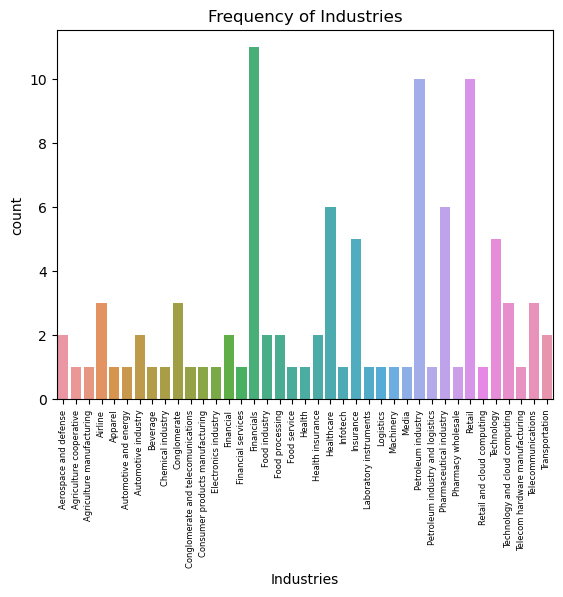

In [16]:
%matplotlib inline
seaborn.countplot(x='Industry', data=dfb)
plt.xlabel("Industries")
plt.title("Frequency of Industries")
plt.xticks(fontsize= 6, rotation= 'vertical')
plt.show()

In [17]:
dfb['Revenue (USD millions)'].describe()

count       100.000000
mean     117566.460000
std      100915.112163
min       44200.000000
25%       57876.000000
50%       80824.500000
75%      138763.000000
max      611289.000000
Name: Revenue (USD millions), dtype: float64

In [18]:
dfb['Revenue (USD millions)'].mean()

117566.46

In [19]:
dfb['Employees'].describe()

count    1.000000e+02
mean     1.680670e+05
std      2.717265e+05
min      3.616000e+03
25%      4.471150e+04
50%      8.963850e+04
75%      1.965125e+05
max      2.100000e+06
Name: Employees, dtype: float64

In [20]:
dfb['Employees'].mean()

168067.02

/var/folders/sv/sr307k4x00qc321sbd_jyd040000gn/T/ipykernel_77959/2744593664.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.barplot(x='Industry', y='Revenue (USD millions)', data=dfb,ci=None)


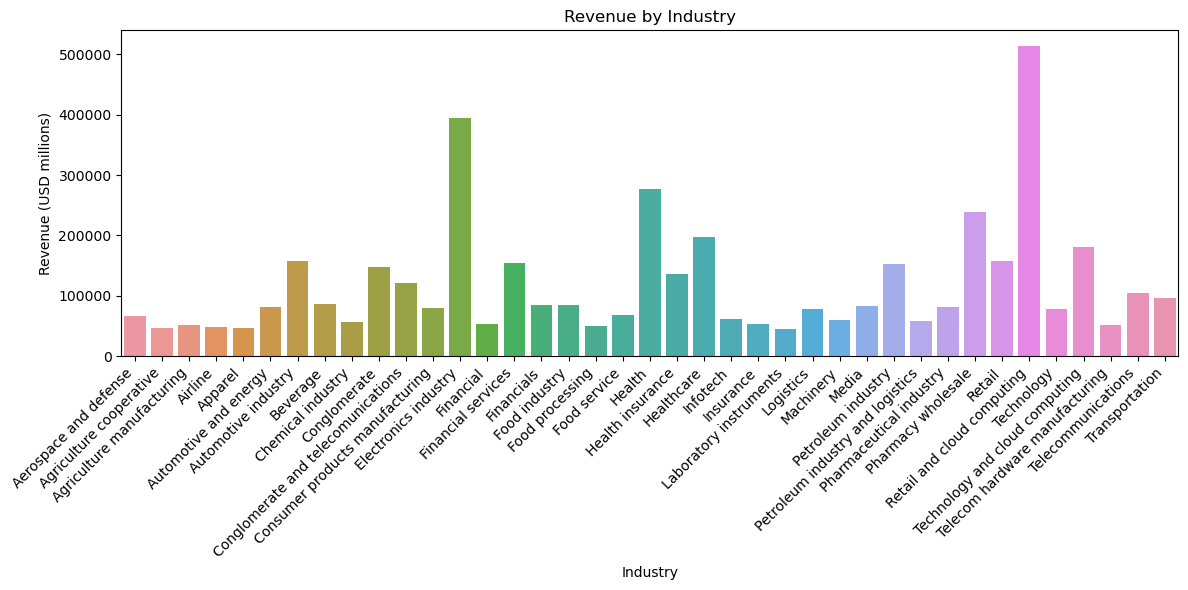

In [21]:
plt.figure(figsize=(12, 6))
seaborn.barplot(x='Industry', y='Revenue (USD millions)', data=dfb,ci=None)
plt.xlabel("Industry")
plt.ylabel('Revenue (USD millions)')
plt.title("Revenue by Industry")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatterplot of Revenue Data')

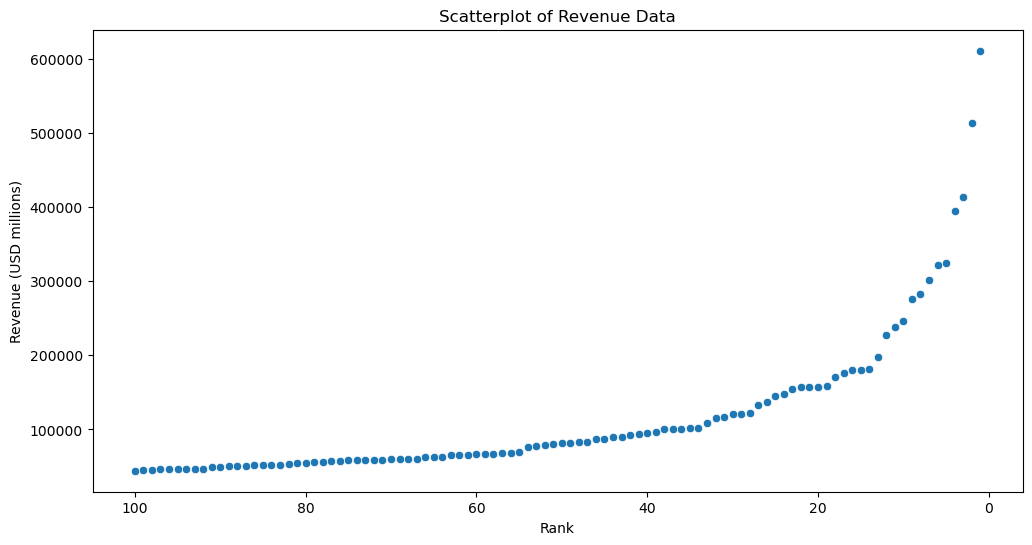

In [22]:
plt.figure(figsize=(12, 6))
seaborn.scatterplot(x='Rank', y='Revenue (USD millions)', data=dfb)
plt.gca().invert_xaxis()
plt.xlabel("Rank")
plt.ylabel('Revenue (USD millions)')
plt.title("Scatterplot of Revenue Data")

In [23]:
numeric_dfb = dfb[['Revenue (USD millions)', 'Employees', 'Rank']]
correlation_matrix = numeric_dfb.corr()
print(correlation_matrix)

                        Revenue (USD millions)  Employees      Rank
Revenue (USD millions)                1.000000   0.641994 -0.774675
Employees                             0.641994   1.000000 -0.352412
Rank                                 -0.774675  -0.352412  1.000000


In [24]:
###import statsmodels.api as sm

In [25]:
import statsmodels.api as sm


In [26]:
result=sm.OLS(dfb['Rank'], dfb['Revenue (USD millions)']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rank   R-squared (uncentered):                   0.169
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              20.06
Date:                Fri, 17 May 2024   Prob (F-statistic):                    2.01e-05
Time:                        22:43:48   Log-Likelihood:                         -539.00
No. Observations:                 100   AIC:                                      1080.
Df Residuals:                      99   BIC:                                      1083.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Revenue (USD millions)     0.0002   3.45e-05      4.479      0.000     8.6e-05       0.000
==============================================================================
Omnibus:                        7.194   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.436
Skew:                          -0.666   Prob(JB):                       0.0243
Kurtosis:                       2.892   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""